In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# 1. Load digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Helper function to plot digit images
def plot_digit(image, label=None, predicted=None):
    plt.imshow(image.reshape(8, 8), cmap='gray')
    title = f"Label: {label}"
    if predicted is not None:
        title += f", Predicted: {predicted}"
    plt.title(title)
    plt.axis('off')
    plt.show()


In [6]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression before PCA
clf_original = LogisticRegression(max_iter=1000)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred_original)
print(f"Accuracy before PCA: {original_accuracy:.4f}")


Accuracy before PCA: 0.9750


In [8]:
# 3. PCA with 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"Number of PCA components to retain 95% variance: {pca.n_components_}")

Number of PCA components to retain 95% variance: 28


In [10]:
# 4. Logistic Regression after PCA
clf_pca = LogisticRegression(max_iter=1000)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA: {pca_accuracy:.4f}")

Accuracy after PCA: 0.9583


Number of misclassified instances: 15


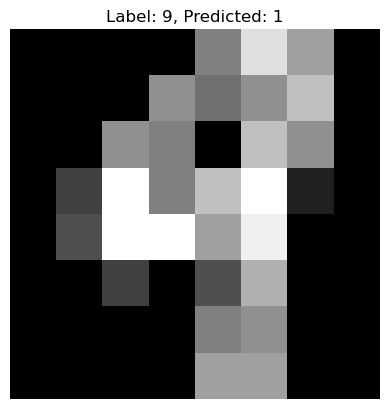

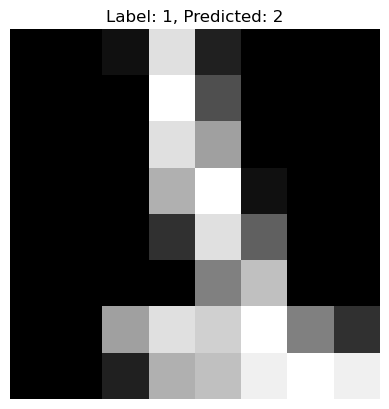

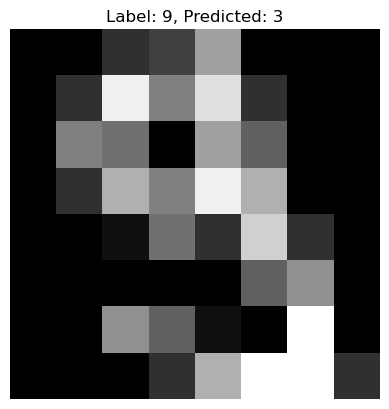

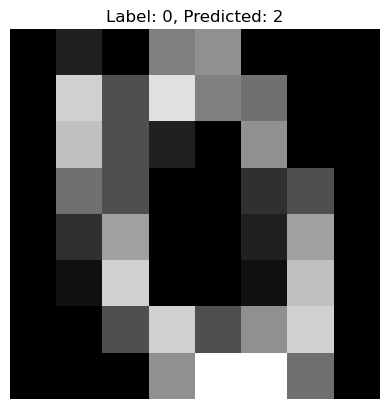

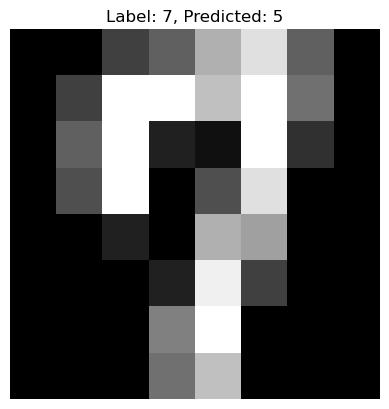

In [12]:
# 5. Confusion matrix and misclassified images
conf_mat = confusion_matrix(y_test, y_pred_pca)
errors = np.where(y_pred_pca != y_test)[0]
print(f"Number of misclassified instances: {len(errors)}")

# Plot misclassified digits
for i in errors[:5]:  # limit to first 5 for display
    plot_digit(X_test[i], label=y_test[i], predicted=y_pred_pca[i])